<a href="https://colab.research.google.com/github/componavt/sns4human/blob/main/src/vk/nlp/lemma_tag_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymorphy2

In [ ]:
pip install emoji

In [ ]:
!pip install googletrans==3.1.0a0

In [13]:
!pip install stopwords

In [ ]:
import pandas as pd
import emoji
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
from googletrans import Translator
from stopwords import get_stopwords
nltk.download('punkt')
nltk.download('punkt_tab')

In [16]:
posts = {
    'state': [
        'https://raw.githubusercontent.com/componavt/sns4human/refs/heads/main/data/vk/posts/aparfenchikov.csv',
        'https://raw.githubusercontent.com/componavt/sns4human/refs/heads/main/data/vk/posts/minnazrk.csv'
    ],
    'museum': [
        'https://raw.githubusercontent.com/componavt/sns4human/refs/heads/main/data/vk/posts/rk_nationalmuseum.csv',
        'https://raw.githubusercontent.com/componavt/sns4human/refs/heads/main/data/vk/posts/olonmus.csv'
    ]
}

morph = pymorphy2.MorphAnalyzer()
translator = Translator()

alphabet = set('абвгдеёжзийклмнопрстуфхцчшщъыьэюя-abcdefghijklmnopqrstuvwxyz')
stopwords = get_stopwords('ru')
stopwords.extend( ['"', '\'', '.', ',', '\n', ':', ';', '?', '!', '', ' ',  '-', '_','[',']','https',])
check_hash = False

dicts_lemm = {}

**Частотный список всех слов по группам: официальные и музейные. В списке рассматриваются только те слова, которых нет в другой группе.**

In [46]:
for key in posts.keys():
    dicts_lemm[key] = {}
    for url in posts[key]:
        df = pd.read_csv(url, header=None, usecols=[1])
        for items in df.items():
            for i in range(1, len(items[1])):
                if not isinstance(items[1][i], str):
                    continue
                tokens = word_tokenize(items[1][i])
                for word in tokens:
                    if word == '#':
                        check_hash = True
                        continue
                    if check_hash:
                        check_hash = False
                        continue
                    set_word = set(word.lower())
                    if word in stopwords or ":" in emoji.demojize(word) or not set_word.issubset(alphabet):
                        continue
                    if word.isupper() and len(word) <= 3:
                        lemma = word
                    else:
                        word = word.lower()
                        lemma = morph.parse(word)[0].normal_form
                    if dicts_lemm[key].get(lemma, 0) == 0:
                        dicts_lemm[key][lemma] = 1
                    else:
                        dicts_lemm[key][lemma] += 1
    dicts_lemm[key] = dict(sorted(dicts_lemm[key].items(), key=lambda item: item[1], reverse=True))

In [47]:
freq_words = {}

for key in dicts_lemm.keys():
    freq_words[key] = {}
    for lemma, count in dicts_lemm[key].items():
        if len(freq_words[key]) == 100:
            break
        for another_key in posts.keys():
            if key != another_key:
                if lemma not in dicts_lemm[another_key]:
                    freq_words[key][lemma] = count
            elif len(posts.keys()) == 1:
                freq_words[key][lemma] = count

    d = {'Частотные слова': freq_words[key].keys(), 'Частота': freq_words[key].values()}
    df = pd.DataFrame(data=d)
    df.to_csv('frequency_' + key + '_groups.csv', index=False, encoding='utf-8')

In [ ]:
!pip install stop_words

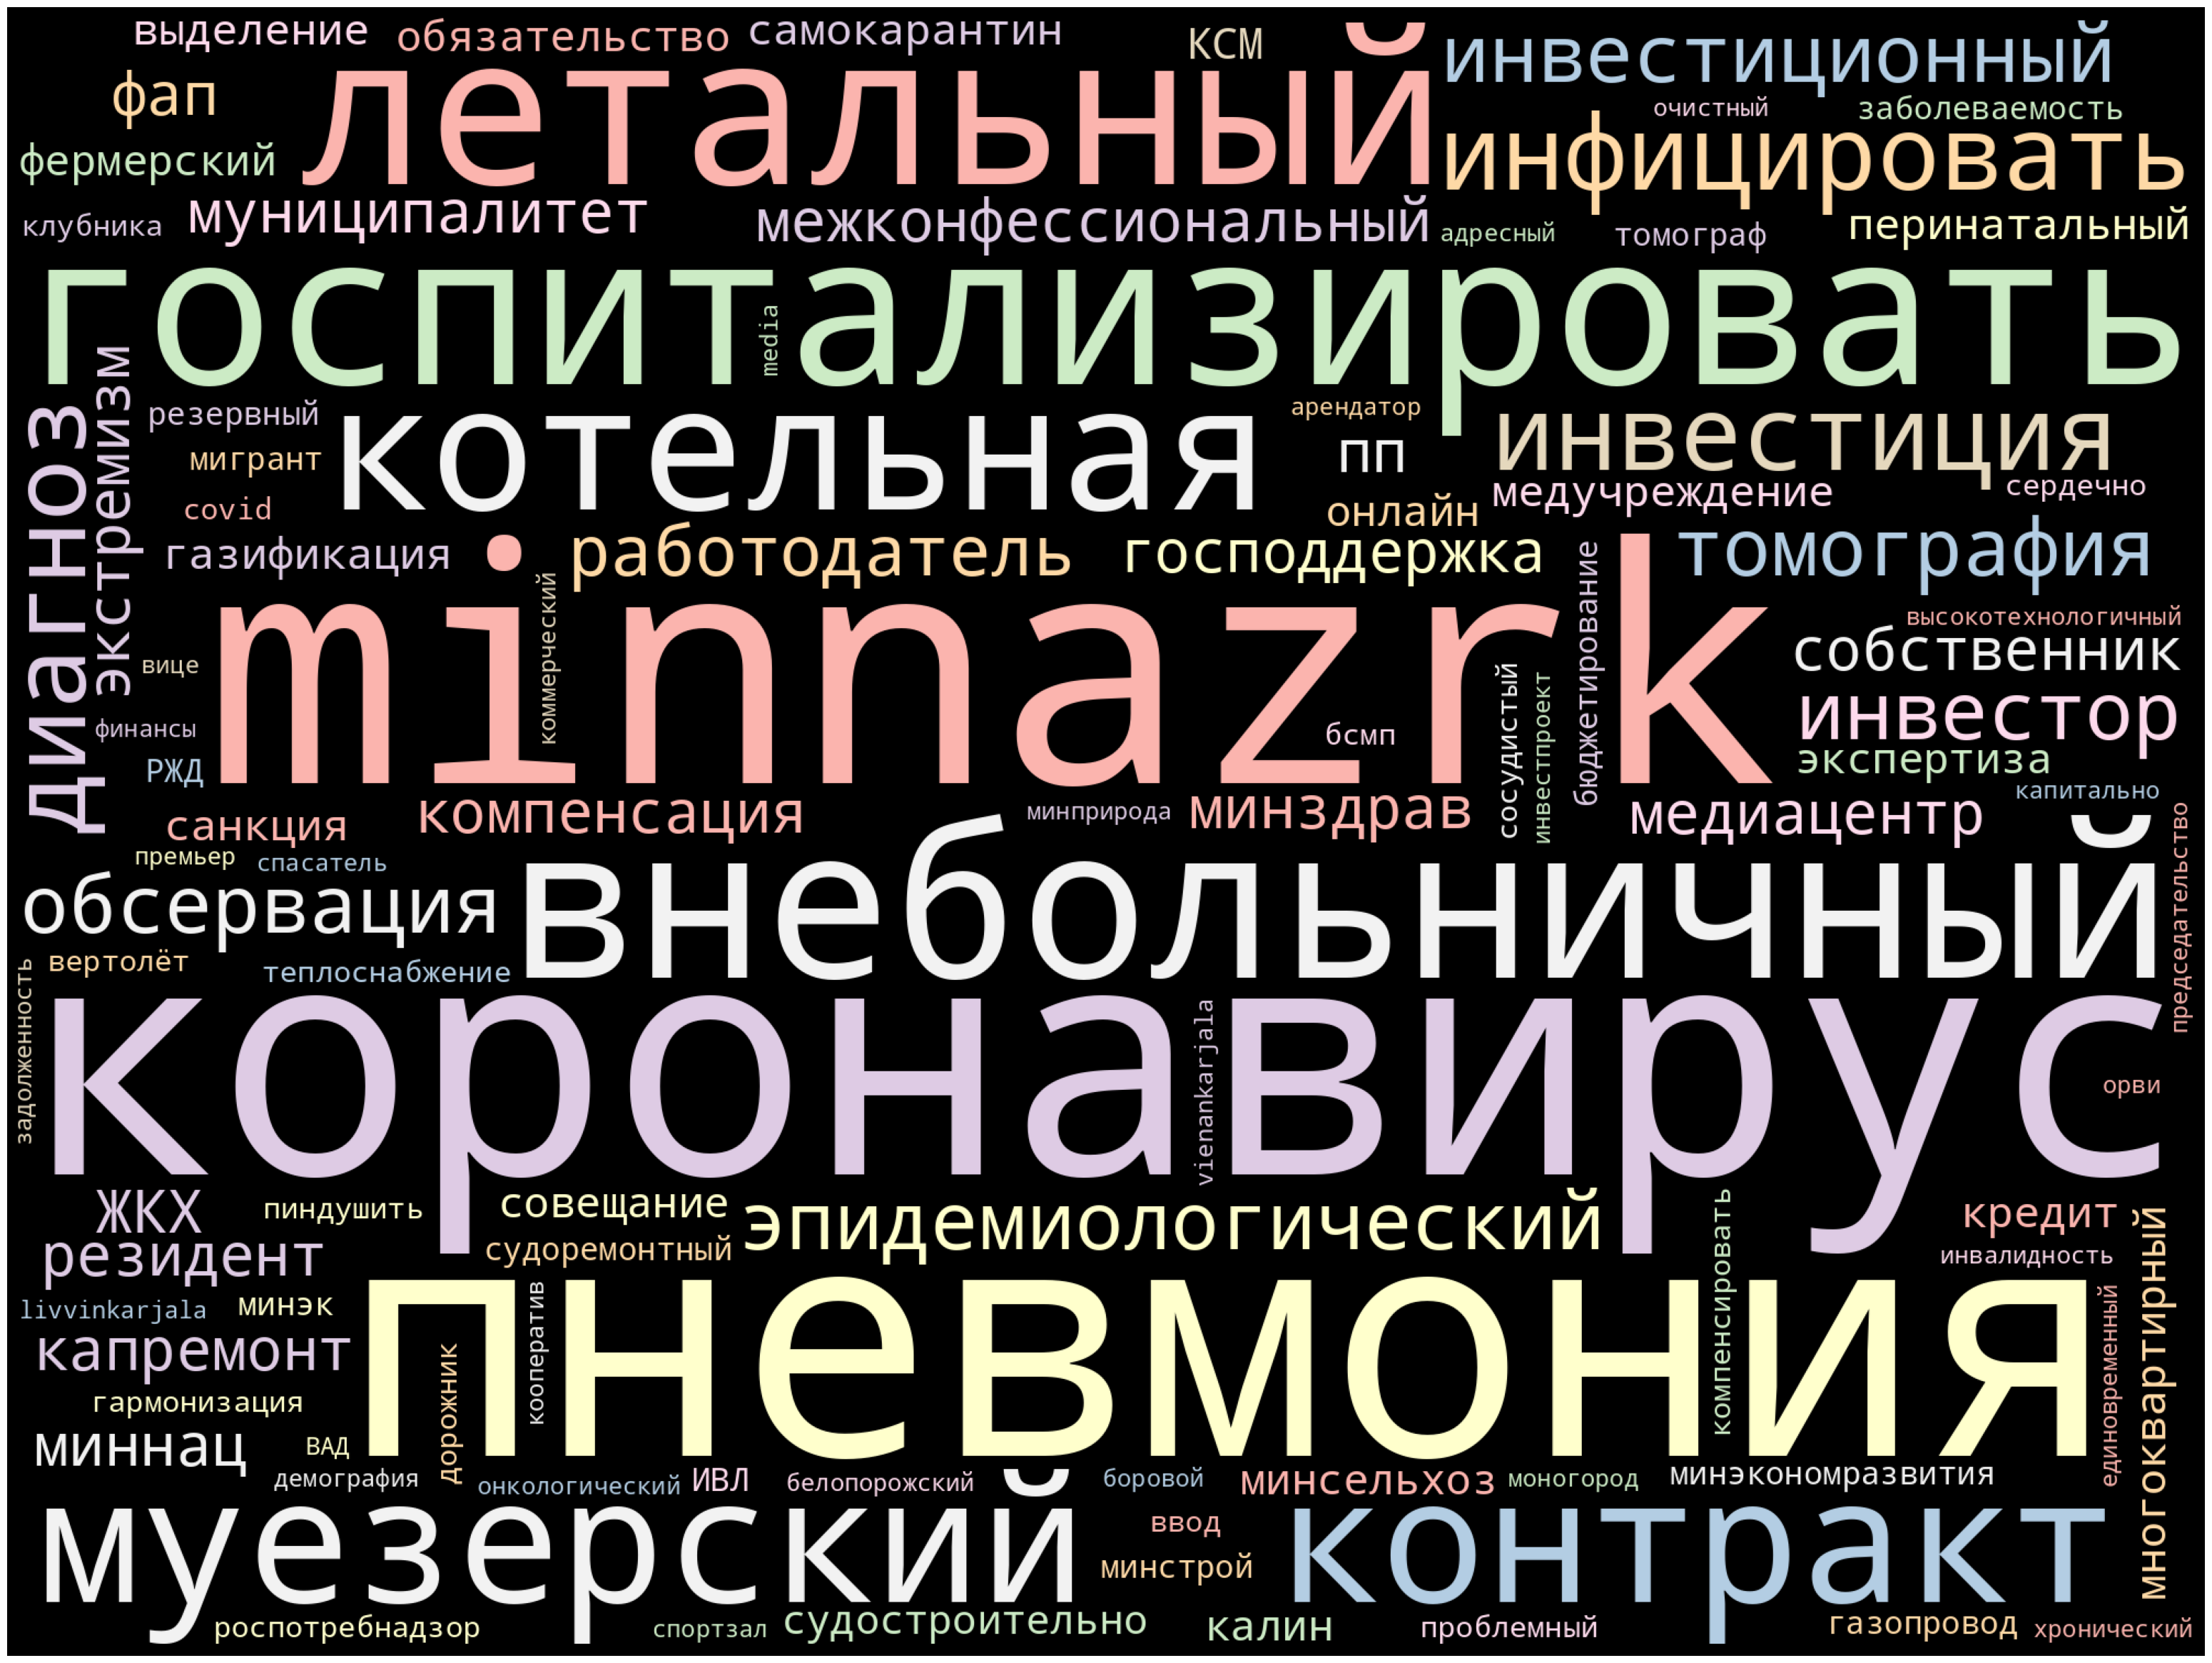

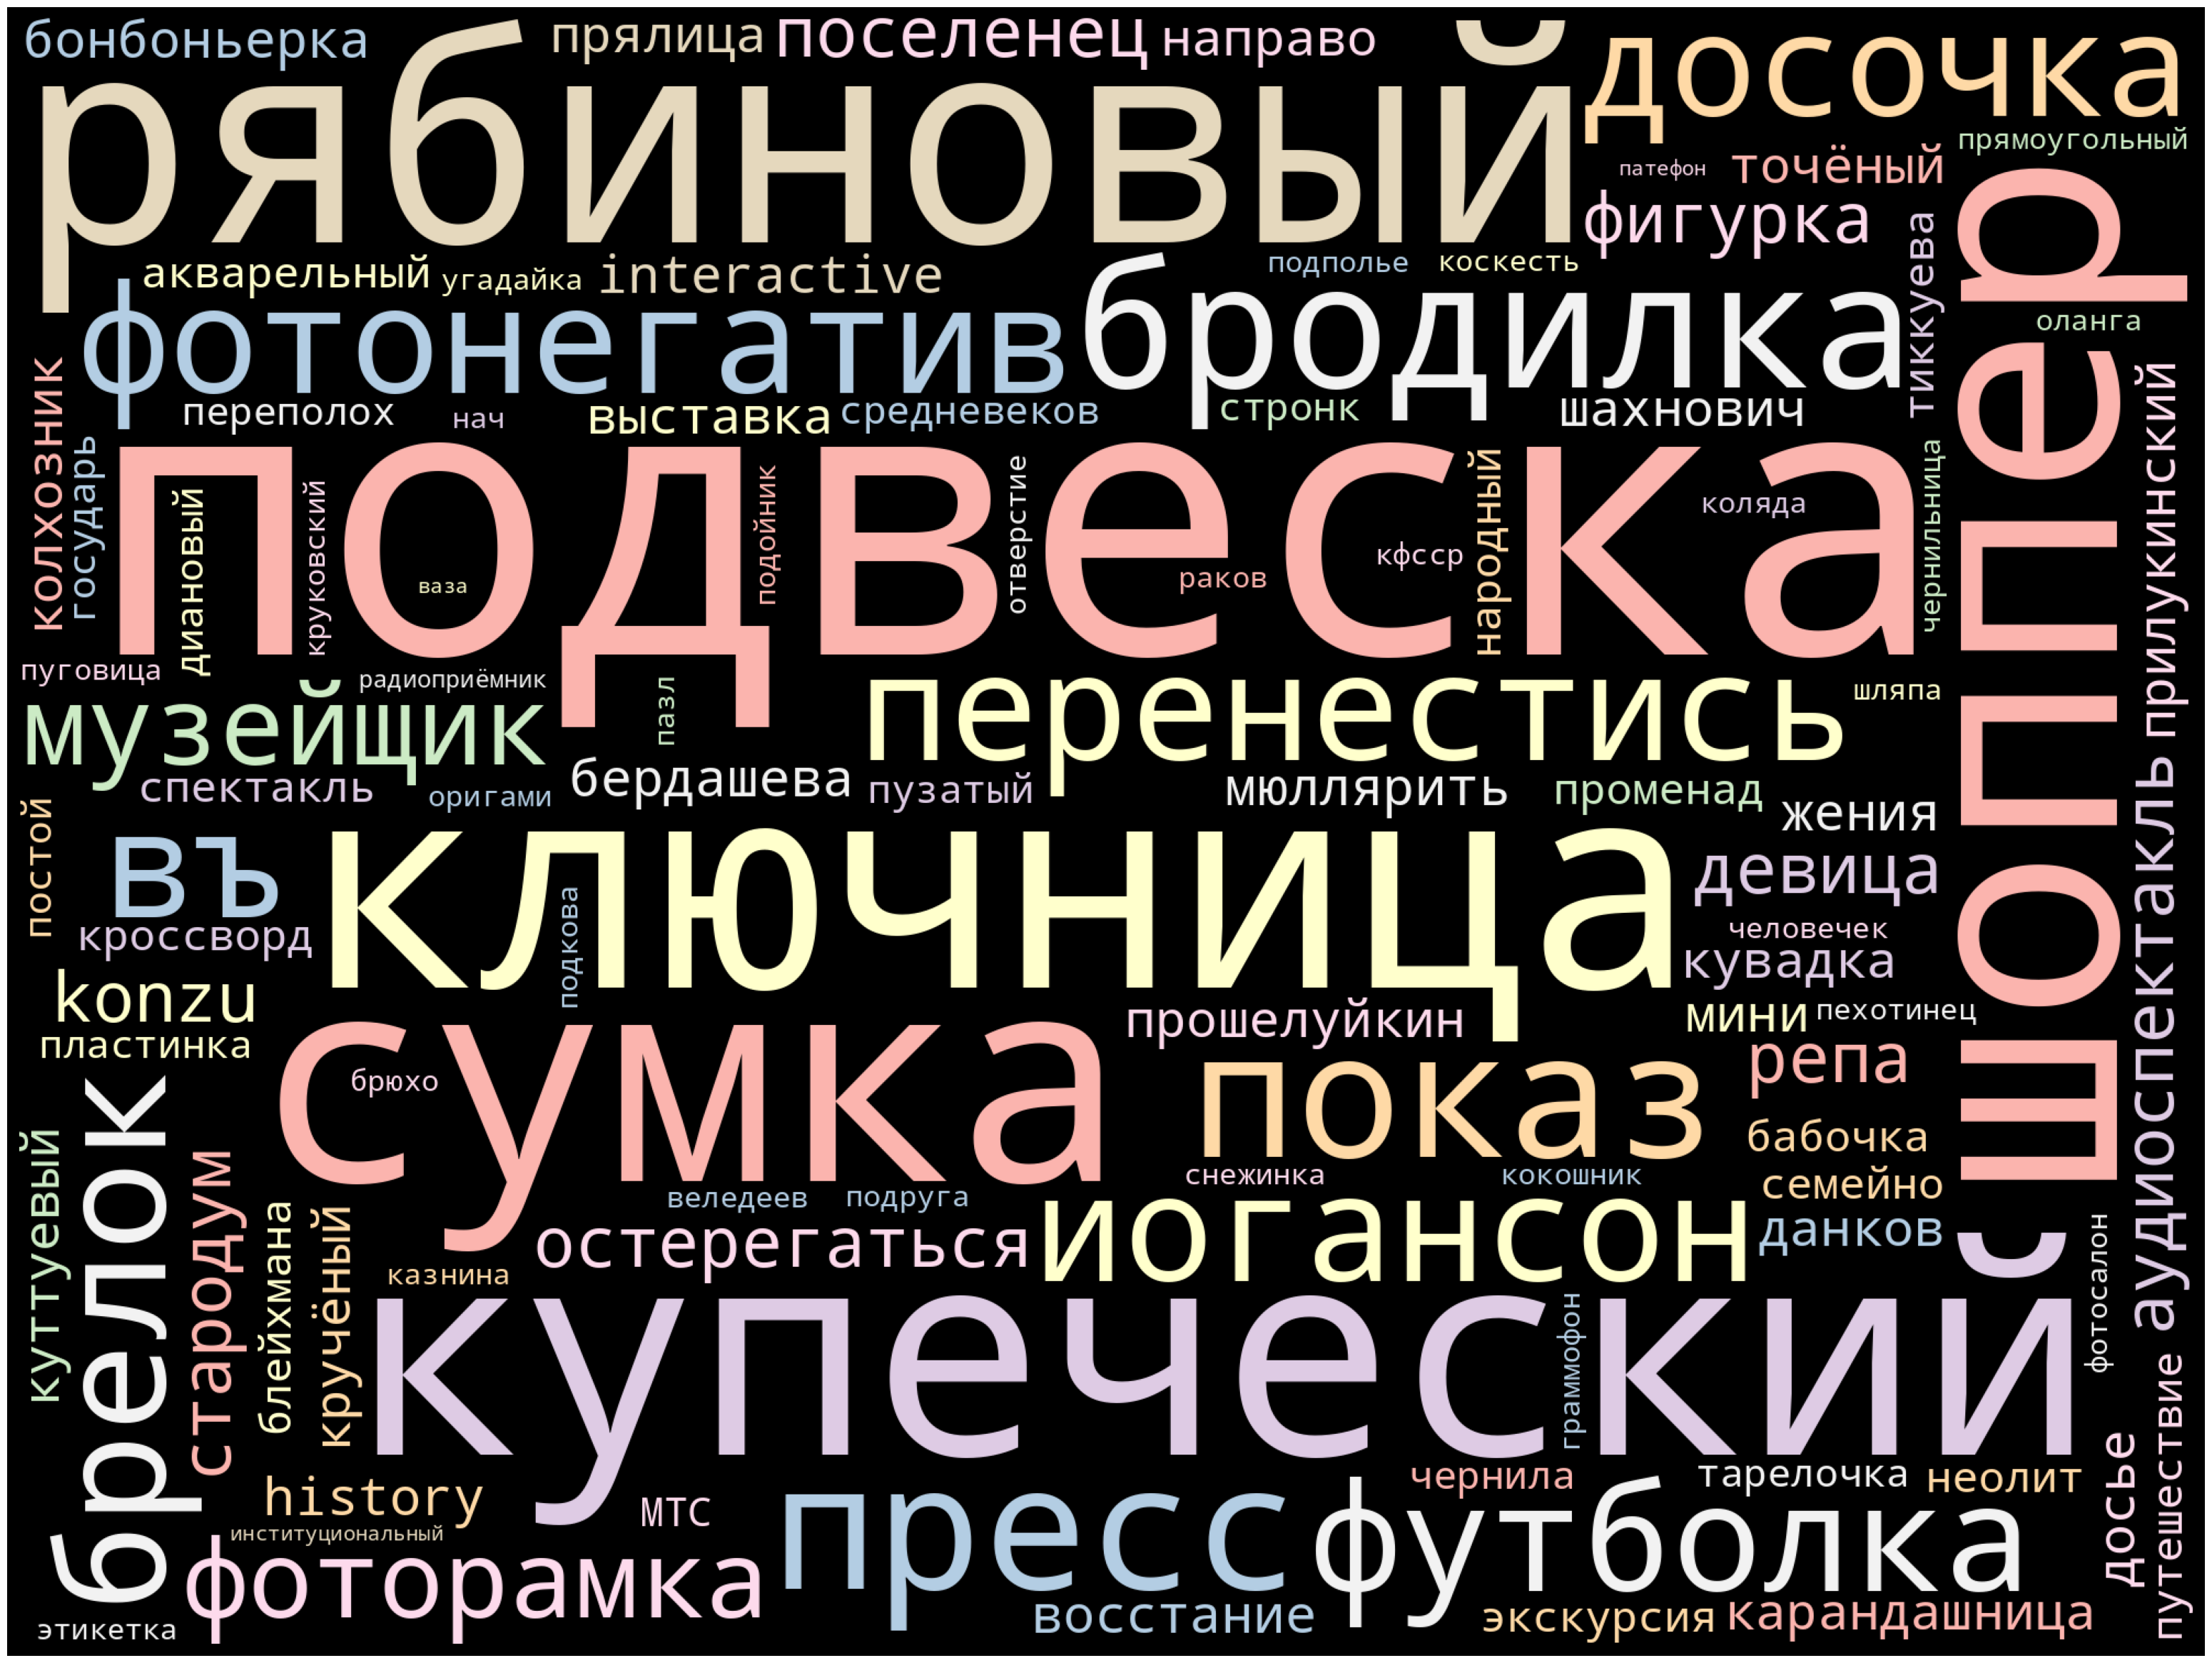

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

for key in posts.keys():
  text = ''
  words = pd.read_csv('frequency_' + key +'_groups.csv', index_col=None)["Частотные слова"].tolist()
  for word in words:
     text += word + ' '
  STOPWORDS_RU = stopwords
  wordcloud = WordCloud(width = 2000,
                        height = 1500,
                        random_state=1,
                        background_color='black',
                        margin=20,
                        colormap='Pastel1',
                        collocations=False,
                        stopwords = STOPWORDS_RU).generate(text)
  plot_cloud(wordcloud)

**Английская версия облака  тэгов**

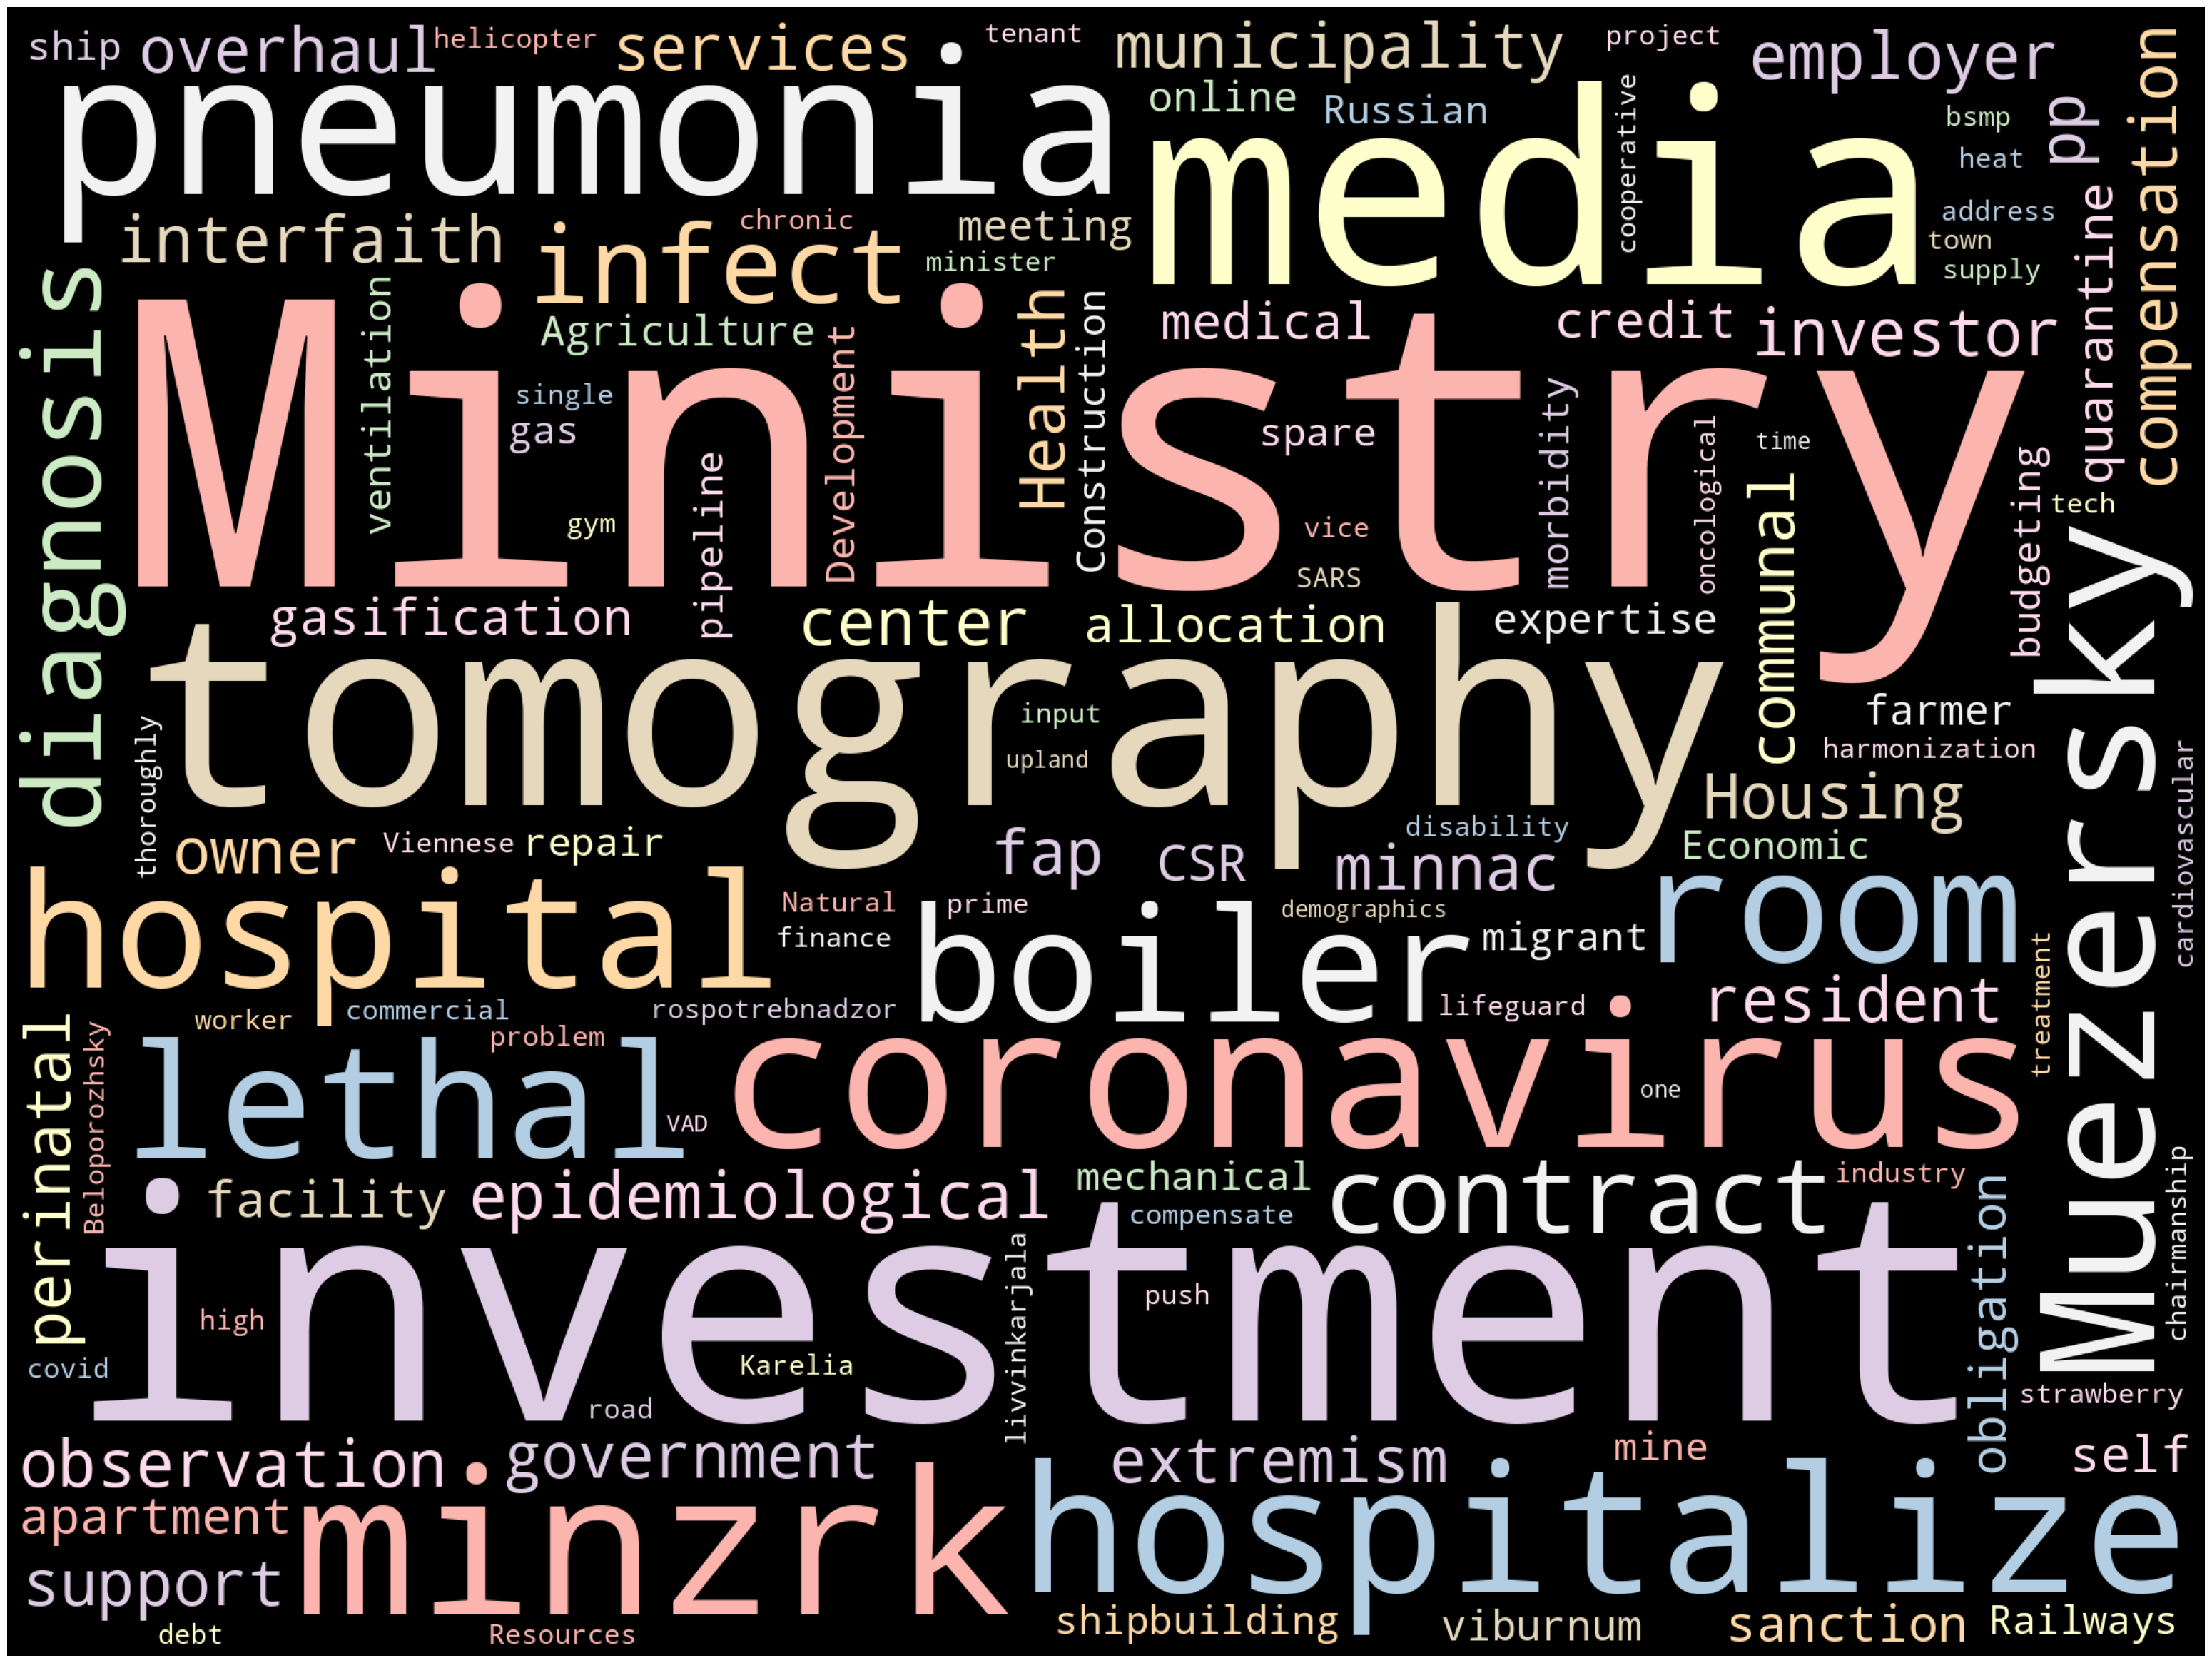

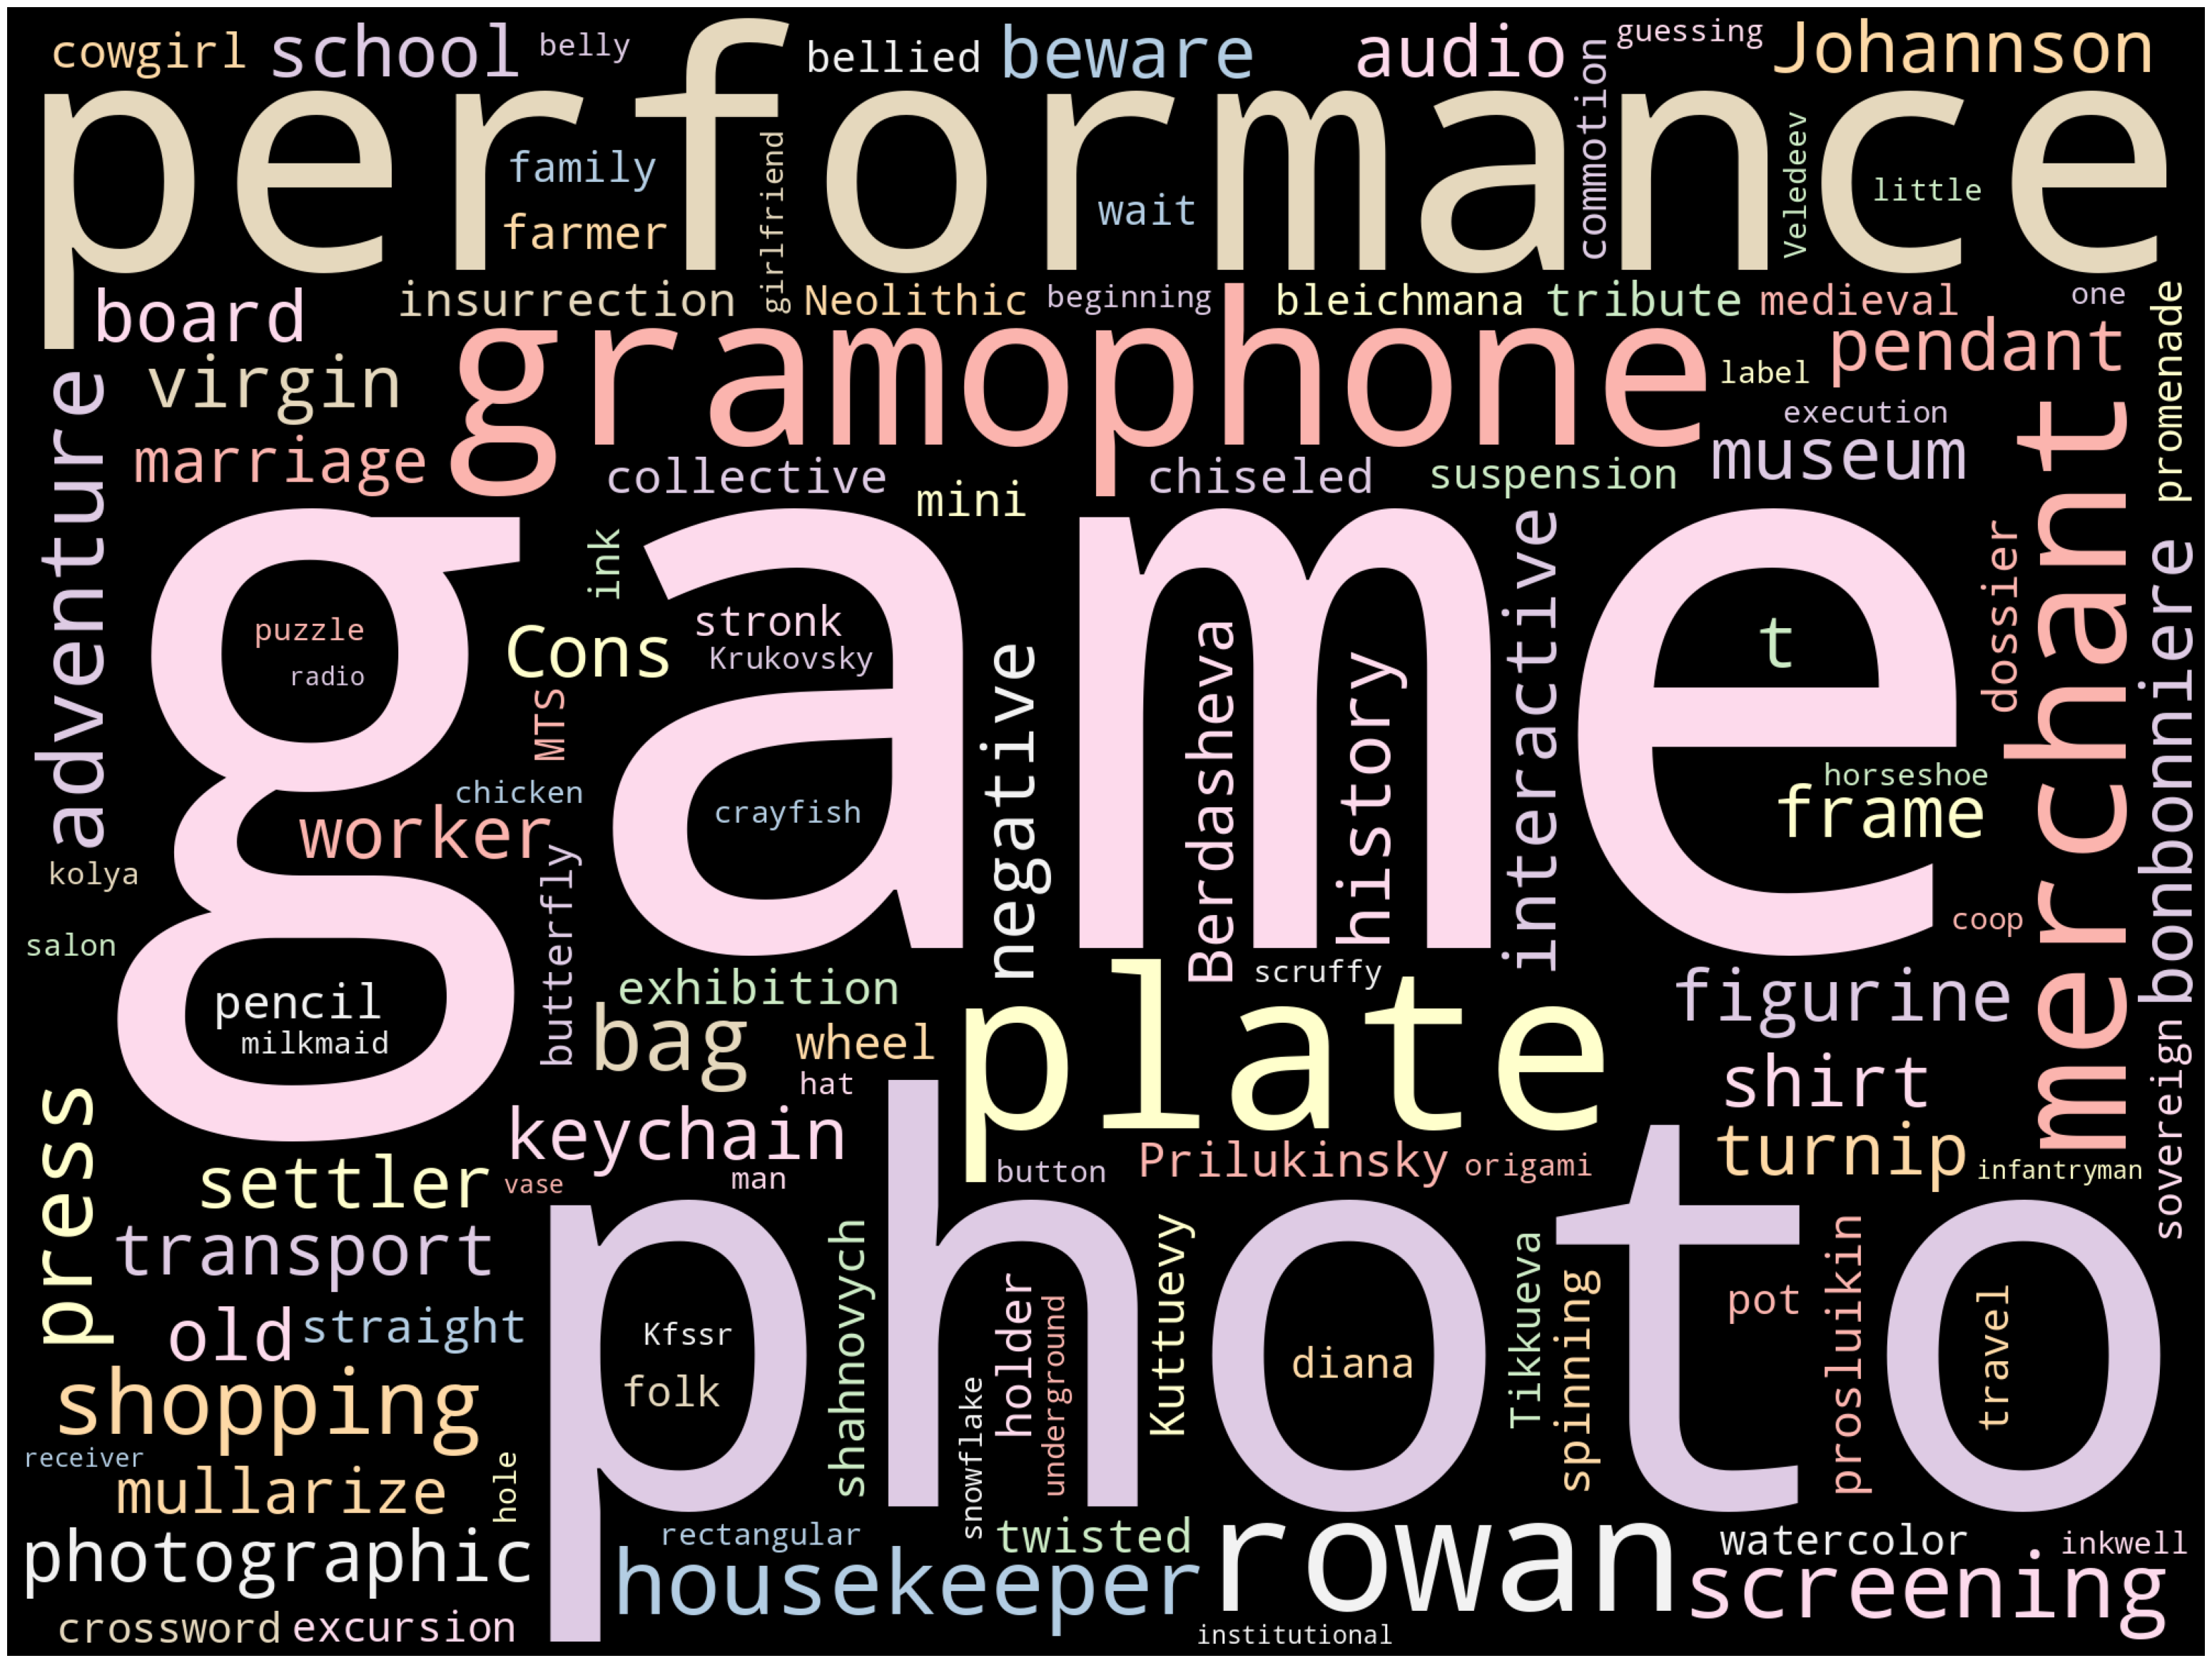

In [49]:
from wordcloud import WordCloud
import stop_words
from stop_words import get_stop_words
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

for key in posts.keys():
  text = ''
  words = pd.read_csv('frequency_' + key +'_groups.csv', index_col=None)["Частотные слова"].tolist()
  for word in words:
     word= translator.translate(word, dest='en').text
     text += word + ' '
  STOPWORDS_RU = get_stopwords('en')
  wordcloud = WordCloud(width = 2000,
                        height = 1500,
                        random_state=1,
                        background_color='black',
                        margin=20,
                        colormap='Pastel1',
                        collocations=False,
                        stopwords = STOPWORDS_RU).generate(text)
  plot_cloud(wordcloud)

**Статистика по 4 Вк группам: количество токенов, уникальных слов, постов, среднее количество слов в посте.**

In [ ]:
pip install -U spacy

In [ ]:
!python -m spacy download ru_core_news_sm

In [50]:
import spacy
groups_posts = []
tokens = []
unique_words = []
mid_len_post = []
nlp = spacy.load("ru_core_news_sm")

def lemmatization(sent):
    doc = nlp(sent)
    hashtag_flag = False
    cnt_tokens = 0
    for token in doc:
        cnt_tokens += 1
        if hashtag_flag:
            lemma = '#' + token.lemma_
            hashtag_flag = False
        else:
            if token.text == '#':
                hashtag_flag = True
                continue
            set_word = set(str(token).lower())
            if str(token) in stopwords or ":" in emoji.demojize(str(token)) or not set_word.issubset(alphabet):
                continue
            lemma = token.lemma_
        if dict_lem.get(lemma, 0) == 0:
            dict_lem[lemma] = 1
        else:
            dict_lem[lemma] += 1
    return cnt_tokens

urls = []
for key in posts.keys():
    for url in posts[key]:
      urls.append(url)
      p = 0
      t = 0
      dict_lem = {}
      df = pd.read_csv(url, header=None, usecols=[1])
      for items in df.items():
          for i in range(1, len(items[1])):
                if not isinstance(items[1][i], str):
                      continue
          for i in range(1, len(items[1])):
              p += 1
              t += lemmatization(str(items[1][i]))
          mid_len_post.append(t // p)
          dict_lem = dict(sorted(dict_lem.items(), key=lambda item: item[1], reverse=True))
          tokens.append(t)
          groups_posts.append(p)
          unique_words.append(len(dict_lem))

d = {'Группа ВК': urls, 'Количество постов': groups_posts, 'Количество токенов': tokens, 'Количество уникальных слов': unique_words, 'Средняя длина поста в словах': mid_len_post}
df = pd.DataFrame(data=d)
df.to_csv('statistics.csv', index=False, encoding='utf-8')